## Clone Repository

In [1]:
!git clone https://github.com/IceKhoffi/chicken-health-behavior-multimodal

Cloning into 'chicken-health-behavior-multimodal'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 122 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (122/122), 4.49 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
#Initialize Path to Cloned Git
main_path = '/content/chicken-health-behavior-multimodal'

## Install Requirements

In [3]:
!python --version

Python 3.11.13


In [4]:
!pip install -r "{main_path}/requirements.txt"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from huggingface_hub import hf_hub_download
from ultralytics import YOLO

## DEMO : chicken-object-detection-yolov11s

https://huggingface.co/IceKhoffi/chicken-object-detection-yolov11s

In [ ]:
# Define each Hugging Face details
repo_id_detection = "IceKhoffi/chicken-object-detection-yolov11s"
filename_detection = "yolov11s.pt"
model_path_detection = hf_hub_download(repo_id=repo_id_detection, filename=filename_detection)

In [8]:
# Load the trained model weights
model = YOLO(model_path_detection)

In [ ]:
test_image = 'image_test.jpg'
test_picture_path = hf_hub_download(repo_id=repo_id_detection, filename=test_image)

In [ ]:
# Perform inference on an image
results = model(test_picture_path)

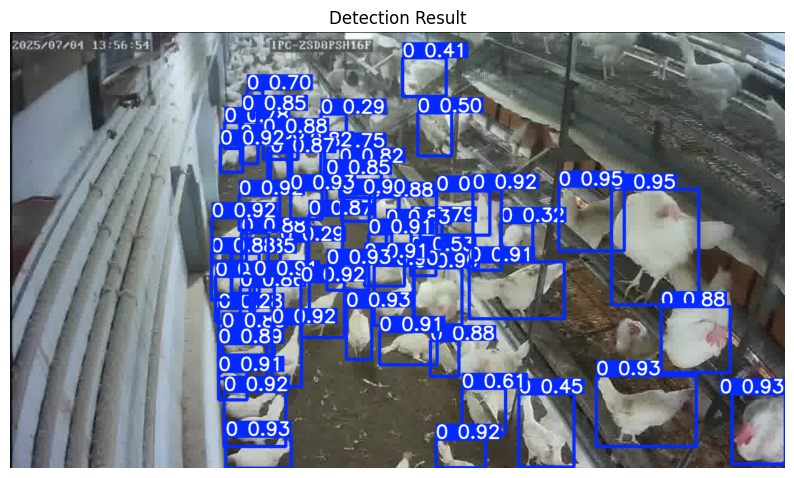

In [12]:
result = results[0]
plt.figure(figsize=(10, 10))
im_array = result.plot()
im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.title("Detection Result")
plt.show()

In [ ]:
test_video = "video_test.mp4"
test_video_path = hf_hub_download(repo_id=repo_id_detection, filename=test_video)

### Distance Estimation

In [ ]:
!python "{main_path}/utils/distance_estimation.py" --video_input {test_video_path} --video_output output_distance.mp4 --model_path {model_path_detection}

### Density Estimation

In [ ]:
!python "{main_path}/utils/density_estimation.py" --video_input {test_video_path} --video_output output_density.mp4 --model_path {model_path_detection}

## DEMO : chicken-vocalization-classifier

https://huggingface.co/IceKhoffi/chicken-vocalization-classifier

In [22]:
repo_id_classifier = "IceKhoffi/chicken-vocalization-classifier"
filename_classifier = "Chicken_CNN_Disease_Detection_Model.pth"
weight_path = hf_hub_download(repo_id=repo_id_classifier, filename=filename_classifier)

In [23]:
audio_test = 'audio_test.mp3'
test_audio_path = hf_hub_download(repo_id=repo_id_classifier, filename=audio_test)

In [24]:
!python "{main_path}/utils/vocalization_prediction.py" --audio_input {test_audio_path} --model_path {weight_path}

Predicted class: Healthy

Class Probabilities:
Healthy: 77.60%
Noise: 0.79%
Unhealthy: 21.60%
